## Import des librairies

In [263]:
import pandas as pd
import numpy as np
import gdown
import os
import shutil

import seaborn as sns
import matplotlib.pyplot as plt



## Ajout du csv depuis le drive

In [313]:
output = 'SBAnational.csv'

if not os.path.isfile(output):
    drive_url = 'https://drive.google.com/uc?id=1vdNaWcJgMzUnlaDVA4FuZRFYinO8UsPQ'
    gdown.download(drive_url, output, quiet=False)

shutil.copy(output, 'DuplicateSBAnational.csv')

df = pd.read_csv('DuplicateSBAnational.csv')

pd.set_option('display.max_rows', 100)

/var/folders/f8/_srl45g93hb_f9bb62qtf1t80000gn/T/ipykernel_82685/3976298782.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DuplicateSBAnational.csv')


In [265]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [266]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

## Regarder combien de valeurs sont manquantes

In [267]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [314]:
df.dropna(subset=['Name','State','BankState','NewExist','RevLineCr','LowDoc','DisbursementDate'], inplace=True)

## Vérifier les doublons identiques

In [315]:
df.duplicated().sum()

0

## Vérifier si la variable RevLine a un rapport avec LowDoc

In [270]:
lignes_T = df[df['RevLineCr'] == 'T']

lignes_Y = df[df['RevLineCr'] == 'Y']

display(lignes_T)
display(lignes_Y)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
325,1002464002,LIFE RAFT AND SURVIVAL EQUIPME,PORTSMOUTH,RI,2871,CITIZENS BANK NATL ASSOC,RI,0,28-Feb-97,1997,...,T,N,NaN,30-Jun-97,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
362,1002745010,"Osmun Music, Inc.",Arlington (Town of),MA,2174,BANK OF AMERICA NATL ASSOC,NC,451140,2-Jun-98,1998,...,T,N,NaN,31-Jul-98,"$50,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"
402,1003076008,MORI ENTERPRISES INC,CLEVELAND,MO,64734,COMMERCE BANK,MO,238990,7-Feb-06,2006,...,T,N,NaN,30-Jun-08,"$40,254.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"
427,1003256003,DIMENSIONS,OCEAN CITY,MD,21842,"PNC BANK, NATIONAL ASSOCIATION",DE,451110,7-Feb-06,2006,...,T,N,25-Jun-08,28-Feb-06,"$20,000.00",$0.00,CHGOFF,"$20,000.00","$20,000.00","$10,000.00"
738,1005264007,AMERICAN CERTIFIED HOME INSPEC,BOISE,ID,83703,WELLS FARGO BANK NATL ASSOC,SD,0,3-Mar-97,1997,...,T,N,NaN,30-Apr-00,"$2,585.00",$0.00,NaN,$0.00,"$10,000.00","$5,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899073,9993953007,VAN EATON GALLERIES,SHERMAN OAKS,CA,91423,WELLS FARGO BANK NATL ASSOC,SD,0,27-Feb-97,1997,...,T,N,NaN,30-Jun-97,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"
899126,9994983007,"SPIRES CARPET OUTLET, INC.",WAYCROSS,GA,31503,WELLS FARGO BANK NATL ASSOC,SD,442210,27-Feb-97,1997,...,T,N,NaN,31-Mar-97,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"
899129,9995013000,SOUTHERN COMMUNICATION CORP,BEAVER,WV,25813,WELLS FARGO BANK NATL ASSOC,SD,0,27-Feb-97,1997,...,T,N,NaN,31-Mar-97,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"
899134,9995083010,RUSHING'S GROCERY,LAURINBURG,NC,28352,WELLS FARGO BANK NATL ASSOC,SD,0,27-Feb-97,1997,...,T,N,NaN,31-Mar-97,"$25,455.00",$0.00,P I F,$0.00,"$20,000.00","$10,000.00"


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,611110,7-Feb-06,2006,...,Y,N,NaN,28-Feb-06,"$438,541.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
30,1000516003,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,238140,7-Feb-06,2006,...,Y,N,NaN,28-Feb-06,"$51,440.00",$0.00,P I F,$0.00,"$35,000.00","$17,500.00"
34,1000536009,HUTMACHER HOLDINGS INC,LEANDER,TX,78641,WELLS FARGO BANK NATL ASSOC,SD,541611,7-Feb-06,2006,...,Y,N,NaN,31-May-06,"$63,076.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"
43,1000653000,LARRY SCHOETTMER FORD INC,EDINBURGH,IN,46124,JPMORGAN CHASE BANK NATL ASSOC,IN,0,11-Jun-80,1980,...,Y,N,4-Oct-89,31-Jul-80,"$197,485.00",$0.00,CHGOFF,"$44,374.00","$200,000.00","$150,000.00"
48,1000685001,ANYWHERE SPORTS PRODUCTIONS,Marina del Ray,CA,90292,WELLS FARGO BANK NATL ASSOC,SD,0,25-Mar-97,1997,...,Y,N,NaN,31-Oct-97,"$30,570.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899076,9994003006,"FIVE STAR ELECTRIC, INC.",PHILADELPHIA,PA,19145,WELLS FARGO BANK NATL ASSOC,PA,235310,27-Feb-97,1997,...,Y,N,NaN,30-Apr-01,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$15,000.00"
899101,9994503003,"WARPED & REAL PROUD, INC.",SEATTLE,WA,98109,BANK OF AMERICA NATL ASSOC,WA,314912,27-Feb-97,1997,...,Y,N,NaN,31-Dec-97,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$37,500.00"
899145,9995233007,"M L B CONSTRUCTION, INC.",ELLICOTT,MD,21043,WELLS FARGO BANK NATL ASSOC,CA,233210,27-Feb-97,1997,...,Y,N,NaN,31-Mar-97,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"
899151,9995393009,"FUTURE CONTRACTING SERVICES, I",DALLAS,PA,18612,"PNC BANK, NATIONAL ASSOCIATION",PA,0,27-Feb-97,1997,...,Y,N,NaN,31-Oct-00,"$80,000.00",$0.00,P I F,$0.00,"$80,000.00","$40,000.00"


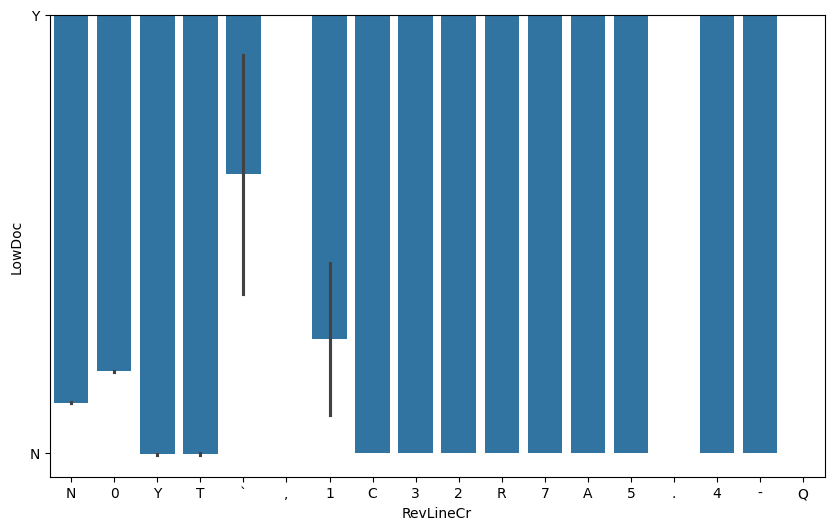

In [271]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['RevLineCr'], y=df['LowDoc'], data=df)
plt.show()

## Définir les statuts manquants dans MIS en Charge-Off

In [316]:
missing_mis_status_with_chgoffdate = df[(df['MIS_Status'].isna() & df['ChgOffDate'].notna()) | df['MIS_Status'].isna() & (df['ChgOffPrinGr'] != 0.0)]

print(missing_mis_status_with_chgoffdate[['MIS_Status', 'ChgOffDate', 'ChgOffPrinGr']])

df.loc[missing_mis_status_with_chgoffdate.index, 'MIS_Status'] = 'CHGOFF'

       MIS_Status ChgOffDate ChgOffPrinGr
343           NaN        NaN       $0.00 
738           NaN        NaN       $0.00 
833           NaN        NaN       $0.00 
897           NaN        NaN       $0.00 
1051          NaN        NaN       $0.00 
...           ...        ...          ...
892077        NaN        NaN       $0.00 
893791        NaN        NaN       $0.00 
894290        NaN        NaN       $0.00 
896318        NaN        NaN       $0.00 
898182        NaN        NaN       $0.00 

[1792 rows x 3 columns]


In [273]:
print(df.loc[missing_mis_status_with_chgoffdate.index, 'MIS_Status'].unique())

['CHGOFF']


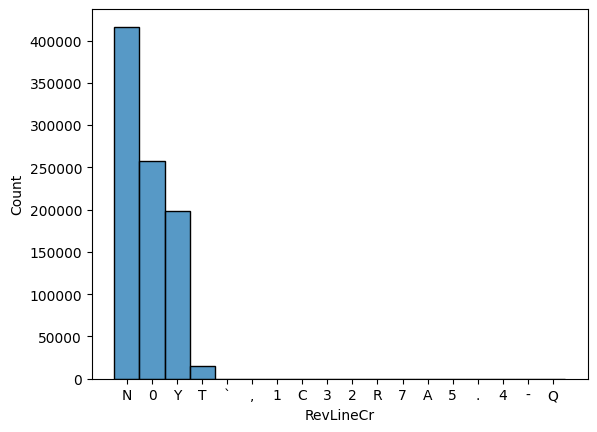

In [274]:
sns.histplot(df['RevLineCr'])
plt.show()

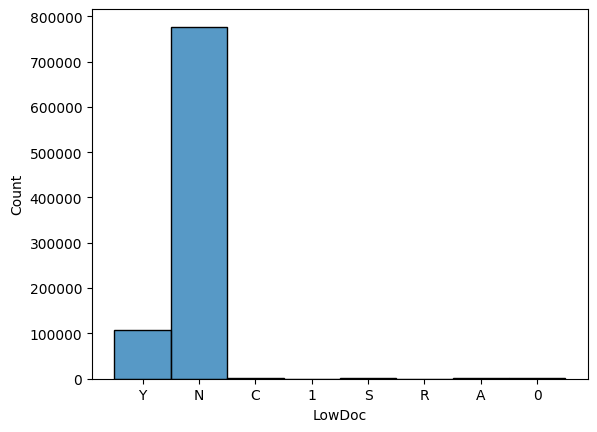

In [275]:
sns.histplot(df['LowDoc'])
plt.show()

In [276]:

display(df['NAICS'].unique())

array([451120, 722410, 621210, ..., 315280, 922140, 221121])

## Enlever les dollars et les virgules des colonnes Disbursement, Balance, ChgOffPrin, GrAppv et SBA_Appv

Les dollars rendent le type de ces variables en objets au lieu de les avoir en entier.

In [317]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].map(lambda x: x.strip().replace('$', '').replace(',', ''))

On peut désormais convertir ces colonnes de type objet en int ou float

In [318]:
df = df.astype({'DisbursementGross':'float', 'BalanceGross':'float','ChgOffPrinGr':'float', 'GrAppv':'float', 'SBA_Appv':'float'})

On a désormais ces 5 colonnes de type float.

## Nettoyage de la variable ApprovalFY

On s'intéresse désormais à la variable ApprovalFY qui devrait être un int

In [279]:
df.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

On remarque une valeur A derrière l'année 1976 parfois, on va donc le retirer pour ne garder que des instances d'entiers

In [319]:
def retire_A(i):
    if isinstance(i, str):
        return i.replace('A', '')
    return i

df.ApprovalFY = df.ApprovalFY.apply(retire_A).astype('int64')

On vérifie que les instances restantes sont bien des int

In [320]:
df['ApprovalFY'].apply(type).value_counts()

ApprovalFY
<class 'int'>    888060
Name: count, dtype: int64

## Le cas du code NAICS

Les entreprises sont classées selon un code NAICS qui définit leur secteur d'activité. On va garder simplement les 2 premiers numéros du code qui correspondent au secteur.

In [282]:
display(df['NAICS'])

0         451120
1         722410
2         621210
3              0
4              0
           ...  
899159    451120
899160    451130
899161    332321
899162         0
899163         0
Name: NAICS, Length: 888060, dtype: int64

In [321]:
tmp = []

for i in df['NAICS']:
    if i == 0:
        tmp.append(0)
    else:
        first_digit = list(str(i))[:2] # récupère les deux premiers caractères et les passe en string
        concat = ''.join(first_digit) # concatène en un seul string
        tmp.append(concat) # On ajoute les nouvelles valeurs à la liste temporaire

df['NAICS'] = tmp # On remplace les valeurs de la colonne NAICS par nos nouvelles valeurs

On va maintenant se débarrasser des itérations où le code NAICS est à 0

In [322]:
naics_null = []

for i in list(df[df['NAICS'] == 0].index):
    naics_null.append(i)

df.drop(naics_null, inplace=True)

Définissons un mappage de nos nouvelles valeurs NAICS selon les index fournis par la SBA

In [323]:
df['NAICS'] = df['NAICS'].map({
    '11':'Agriculture,Forestry,Fishing,Hunting',
    '21':'Mining,Quarrying,Oil and Gas Extraction',
    '22':'Utilities',
    '23':'Construction',
    '31':'Manufacturing',
    '32':'Manufacturing',
    '33':'Manufacturing',
    '42':'Wholesale trade',
    '44':'Retail trade',
    '45':'Retail trade',
    '48':'Transportation,Warehousing',
    '49':'Transportation,Warehousing',
    '51':'Information',
    '52':'Finance,Insurance',
    '53':'Real Estate,Rental,Leasing',
    '54':'Proffesional,Scientific,Tech Service',
    '55':'Management of Companies and Enterprises',
    '56':'Administrative and Support,Waste Management,Remediation Services',
    '61':'Educational',
    '62':'Health Care,Social Assistance',
    '71':'Arts,Entertainment,Recreation',
    '72':'Accomodation,Food Services',
    '81':'Other Services',
    '92':'Public Administration'
})

## Convertir New Exist en variable binaire

In [324]:
df.NewExist.unique()

array([2., 1., 0.])

In [287]:
df['NewExist'].value_counts()

NewExist
1.0    497845
2.0    191031
0.0       727
Name: count, dtype: int64

On considère que les valeurs à 0 sont minimes (1 représente normalement la valeur NON), on va donc ne pas les considérer

In [325]:
df = df[(df['NewExist']==1) | (df['NewExist']==2)]

df.loc[(df['NewExist']==1), 'NewExist'] = 0
df.loc[(df['NewExist']==2), 'NewExist'] = 1

In [289]:
df.NewExist.unique()

array([1., 0.])

## LowDoc et RevLineCr

In [290]:
print(df.LowDoc.unique())
print(df.RevLineCr.unique())

['Y' 'N' 'C' '1' 'S' 'R' 'A' '0']
['N' 'Y' '0' 'T' '`' ',' '1' 'C' '2' 'R' '7' 'A' '-' 'Q']


On ne garde que les valeurs à Y et N pour Yes et No que l'on va convertir en binaire

In [326]:
df = df[(df.LowDoc == 'Y')|(df.LowDoc == 'N')]
df = df[(df.RevLineCr == 'Y')|(df.RevLineCr == 'N')]

df['LowDoc'] = np.where(df['LowDoc'] == 'Y', 1, 0)
df['RevLineCr'] = np.where(df['RevLineCr'] == 'Y', 1, 0)

In [292]:
print(df.LowDoc.unique())
print(df.RevLineCr.unique())

[1 0]
[0 1]


In [293]:
df.UrbanRural.value_counts()

UrbanRural
1    286741
0    108436
2     63222
Name: count, dtype: int64

On considère dans un premier temps de laisser les colonnes UrbanRural undefined qui constituent une bonne portion de valeurs

## Definir MIS_STATUS en binaire

In [327]:
df['MIS_Status'] = np.where(df['MIS_Status']=='P I F', 1, 0)
df['MIS_Status'].value_counts()

MIS_Status
1    358558
0     99841
Name: count, dtype: int64

## Convertir les dates au bon format

On cherche maintenant à récupérer les dates au même format. On va donc appliquer une conversion à toutes les dates ApprovalDate et DisbursementDate

In [328]:
df[['ApprovalDate','DisbursementDate']] = df[['ApprovalDate','DisbursementDate']].apply(pd.to_datetime)

/var/folders/f8/_srl45g93hb_f9bb62qtf1t80000gn/T/ipykernel_82685/3669985856.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[['ApprovalDate','DisbursementDate']] = df[['ApprovalDate','DisbursementDate']].apply(pd.to_datetime)
/var/folders/f8/_srl45g93hb_f9bb62qtf1t80000gn/T/ipykernel_82685/3669985856.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[['ApprovalDate','DisbursementDate']] = df[['ApprovalDate','DisbursementDate']].apply(pd.to_datetime)


## Le code de la franchise

On doit passer le code de la franchise en binaire, afin de savoir si le business est franchisé ou non

In [296]:
df.FranchiseCode.unique()

array([    1, 15100, 10656, ..., 16452, 75985, 42533])

On remarque que nous avons beaucoup de valeurs qui indiquent si les business sont une franchise, les codes 00000 et 00001 indiquent que ce n'est pas le cas. Nous allons donc les séparer en 2 instances, 1 et 0 dans une colonne Franchise.

In [329]:
df.loc[(df['FranchiseCode']<=1), 'Franchise'] = 0
df.loc[(df['FranchiseCode']>1), 'Franchise'] = 1

In [298]:
df.Franchise

0         0.0
1         0.0
2         0.0
5         0.0
7         0.0
         ... 
899145    0.0
899146    0.0
899157    0.0
899160    0.0
899161    0.0
Name: Franchise, Length: 458399, dtype: float64

## MIS STATUS 

/Users/sims/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sims/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


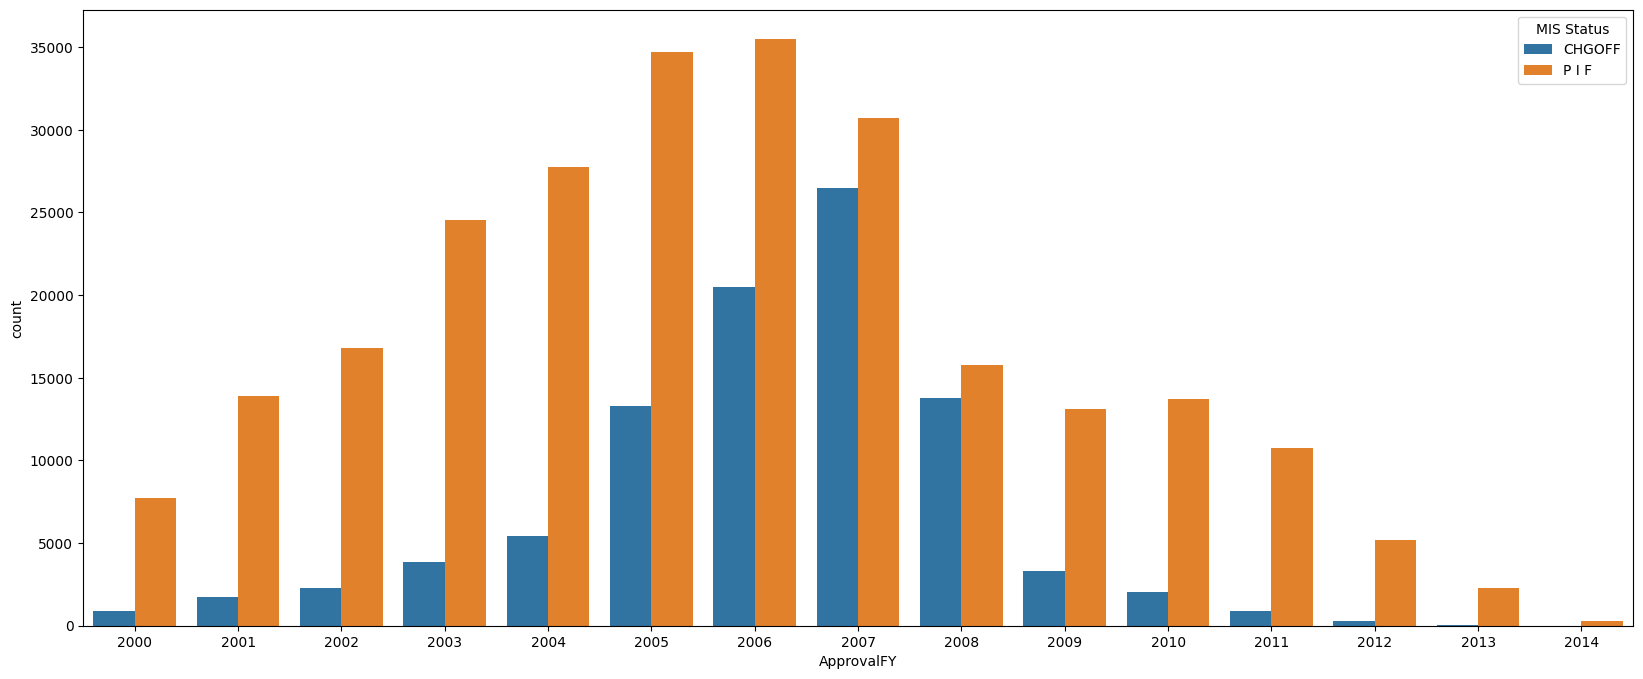

In [340]:
plt.figure(figsize=(20,8))
sns.countplot(data=df[df['ApprovalFY'] >= 2000], x='ApprovalFY', hue='MIS_Status')
plt.legend(title='MIS Status', labels=['CHGOFF','P I F'])
plt.show()

On remarque une hausse anormale du nombre de ChargeOff comparé au PIF, à partir de 2007 notamment, ce qui peut s'expliquer par le contexte économique de cette période et du crack boursier de 2008, marquant la période de la Grande Récession. On peut donc se demander s'il est plus pertinent de sauter les années entre 2007 et 2009 pour éviter les données biaisées par ce facteur extra.

In [330]:
dfCrack = df[(df['ApprovalFY'] == 2007) | (df['ApprovalFY'] == 2008) | (df['ApprovalFY'] == 2009)]  # On garde les valeurs entre 2007 et 2009 pour l'EDA

dfNeutre = df[~df['ApprovalFY'].isin([2007, 2008, 2009])]


## Le nombre d'employés

In [331]:
dfNeutre['NoEmp'].value_counts()

NoEmp
1       61900
2       55802
3       36406
4       29293
5       24105
        ...  
8000        1
576         1
178         1
604         1
273         1
Name: count, Length: 421, dtype: int64

D'après les conditions d'éligibilité au SBA, les entreprises de plus de 1500 employés ne sont pas acceptées. On va donc garder les entreprises dont le nombre d'employés ne dépasse pas ce palier.

In [332]:
dfNeutre = dfNeutre[dfNeutre['NoEmp']<=1500]

In [333]:
dfNeutre['NoEmp'].value_counts()

NoEmp
1       61900
2       55802
3       36406
4       29293
5       24105
        ...  
178         1
289         1
900         1
1250        1
273         1
Name: count, Length: 374, dtype: int64

## Le terme du prêt

In [334]:
dfNeutre['Term'].unique()

array([ 84,  60, 180, 120, 297, 162,  12,  87, 126,  83, 240, 102,  80,
        42,  26,  36,  54,  66,  96,  93,  27,  82,  32, 112,  73, 255,
        55,  35,   5,  62,  72,   6,  46,  70,  52,  48,  65,  47,  58,
         1,  74,  16,   7,   4,  63,  56,  10,  22,   0,  40,   3,  23,
       300,  11,  17,  21,  43,  91,  89,   2,  34,  14,   9,  78,  18,
       129,  97,   8,  29,  30,  39,  24,  13,  15, 228,  57,  59, 208,
        44,  81,  38,  85,  77,  69,  51, 144,  64, 111,  90,  75, 306,
       183,  71,  28,  49, 119, 116,  76, 113, 191,  19,  45,  99,  25,
        98, 118, 166, 114,  94, 231,  33, 108, 157, 165,  41, 309, 106,
        20,  50, 229, 204,  31, 276, 115,  53, 174,  37,  95,  61,  79,
       131, 133, 123,  67, 122,  68, 268, 294, 238, 246, 124, 186,  86,
       192, 128, 147, 280, 318, 264, 121, 216, 100, 278, 107,  88, 283,
       101, 104, 117, 187, 103, 136, 288, 175, 139, 241, 156, 303, 177,
       273, 132, 189, 222, 164, 301, 196, 155, 243, 252, 135, 18

On trouve la valeur zéro, qui n'est pas cohérente 

In [335]:
dfNeutre[dfNeutre['Term'] == 0]['MIS_Status'].value_counts()

MIS_Status
0    372
1     28
Name: count, dtype: int64

On ne va donc pas garder les colonnes où le terme du prêt est fixé à 0

In [336]:
dfNeutre = dfNeutre[dfNeutre['Term']!= 0]

## Drop des colonnes inutiles dans la modélisation

In [337]:
# dfNeutre.drop(columns=['Name','City','Zip','Bank','BankState','ApprovalDate','CreateJob','RetainedJob','FranchiseCode','ChgOffDate','DisbursementDate','DisbursementGross','BalanceGross','ChgOffPrinGr'], inplace=True)
dfNeutre.drop(columns=['ApprovalDate','ChgOffDate','DisbursementDate','DisbursementGross','BalanceGross','ChgOffPrinGr'], inplace=True)

## Dataframe nettoyé

In [308]:
dfNeutre.shape

(354706, 23)

In [309]:
dfNeutre.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Franchise
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,Retail trade,1997-02-28,1997,...,0,0,1,0,0,1,1,60000.0,48000.0,0.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,"Accomodation,Food Services",1997-02-28,1997,...,0,0,1,0,0,1,1,40000.0,32000.0,0.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,"Health Care,Social Assistance",1997-02-28,1997,...,0,0,1,0,0,0,1,287000.0,215250.0,0.0
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,Manufacturing,1997-02-28,1997,...,0,0,1,0,0,0,1,517000.0,387750.0,0.0
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,Other Services,1997-02-28,1997,...,0,0,1,0,0,1,1,45000.0,36000.0,0.0


In [338]:
dfNeutre.to_csv("SBAcleaned.csv", index=False)

In [339]:
dfNeutre.dtypes

LoanNr_ChkDgt      int64
Name              object
City              object
State             object
Zip                int64
Bank              object
BankState         object
NAICS             object
ApprovalFY         int64
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr          int64
LowDoc             int64
MIS_Status         int64
GrAppv           float64
SBA_Appv         float64
Franchise        float64
dtype: object